In [1]:
import sklearn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#import boston housing dataset from sklearn
from sklearn.datasets import load_boston

housing = load_boston()
boston = pd.DataFrame(housing.data, columns = housing.feature_names)
boston['MEDV'] = housing.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#normalize the features and do a train-test split of 70-30 with random_state = 42 and convert to torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = boston.drop(columns = ['MEDV'])
y = boston['MEDV'].to_numpy()

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
#y = pd.Series(y).array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)


In [4]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).view(-1, 1).float()

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).view(-1, 1).float()

datasets = torch.utils.data.TensorDataset(X_train, y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=False)

testdata = torch.utils.data.TensorDataset(X_test, y_test)
test_iter = torch.utils.data.DataLoader(testdata, batch_size=10, shuffle=False)



In [5]:
#Define training hyperprameters
batch_size=10
num_epochs = 300
size_hidden = 100

#Calculate some other hyperparameters based on data.  
batch_no = len(X_train) // batch_size  #batches
cols = X_train.shape[1] #Number of columns in input matrix
n_output = 1

In [6]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = nn.Linear(cols, size_hidden)   # hidden layer
        self.predict = nn.Linear(size_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
net = Net(cols, size_hidden, n_output)

In [7]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = nn.MSELoss() 

In [8]:
loss_values_train = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in train_iter:
            # forward pass
            outputs = net(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer.step()
        #print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
        loss_values_train.append(running_loss)
        running_loss = 0.0            


loss_values_test = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in test_iter:
            # forward pass
            outputs = net(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer.step()
        #print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
        loss_values_test.append(running_loss)
        running_loss = 0.0  
                

Text(0.5, 1.0, 'Boston Housing Linear Regression Learning Curve with rate 0.01')

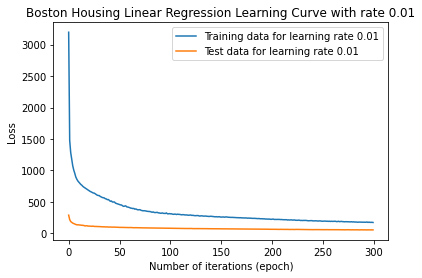

In [9]:
plt.plot(loss_values_train, label='Training data for learning rate 0.01')
plt.plot(loss_values_test, label='Test data for learning rate 0.01')
plt.legend()
plt.xlabel('Number of iterations (epoch)')
plt.ylabel('Loss')
plt.title('Boston Housing Linear Regression Learning Curve with rate 0.01')

In [10]:
import pandas as pd
from sklearn.metrics import r2_score, accuracy_score
from torch.autograd import Variable

def calculate_r2(x,y=[]):
    # Evaluate the model with the test set. 
    X = Variable(torch.FloatTensor(x))  
    result = net(X) #This outputs the value for regression
    result=result.data[:,0].numpy()
  
    if len(y) != 0:
        r2 = r2_score(result, y)
        return r2

In [11]:
training_r2 = calculate_r2(X_train,y_train)
test_r2 = calculate_r2(X_test,y_test)

print("R-Squared for training data is: ", training_r2)
print("R-Squared for test data is: ", test_r2)

R-Squared for training data is:  0.8061950505915058
R-Squared for test data is:  0.9592118922839692


In [12]:
optimizer2 = torch.optim.SGD(net.parameters(), lr=0.001)
criterion = torch.nn.MSELoss() 

In [13]:
loss_values_train2 = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in train_iter:
            # forward pass
            outputs = net(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer2.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer2.step()
        #print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
        loss_values_train2.append(running_loss)
        running_loss = 0.0            

loss_values_test2 = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in test_iter:
            # forward pass
            outputs = net(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer2.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer2.step()
        #print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
        loss_values_test2.append(running_loss)
        running_loss = 0.0  
                

Text(0.5, 1.0, 'Boston Housing Linear Regression Learning Curve with rate 0.001')

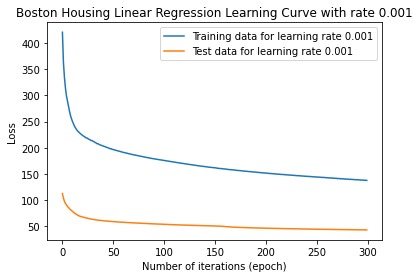

In [14]:
plt.plot(loss_values_train2, label='Training data for learning rate 0.001')
plt.plot(loss_values_test2, label='Test data for learning rate 0.001')
plt.legend()
plt.xlabel('Number of iterations (epoch)')
plt.ylabel('Loss')
plt.title('Boston Housing Linear Regression Learning Curve with rate 0.001')

**Compare the performance on the training data with performance on the test data.**

We see an R-Squared score of 0.806 for the training data and
0.959 for the test data. This tells us that the test data fit closer to the curve than the training data, making room for a better generalized model.

**Did you see any major difference between the two learning rates that you used?** 

From the learning curves, we can see that using a lower learning rate gives a curve with high variance meaning that the model using that learning rate will benefit from more data.


**How many iterations were needed for convergence?**

The larger (0.01) learning rate being 10 times the smaller (0.001) one, we see a convergence at about 100 iterations in the training set while we can see that the smaller learning rate is slowly converging at 250 iterations.
